In [1795]:
# import libraries and run a few checks
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import pandas as pd
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rcParams
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

import seaborn as sns
sns.set(palette='Paired', style='white')

import warnings 
warnings.filterwarnings('ignore')

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

# utility function to save figures for presentation
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Load dataset

In [1796]:
#pathsegment = "/cpiestage/jtlau/DS_project/test/"
#dataset = pd.read_csv(f'{pathsegment}/TMBD Movie Dataset.csv')

In [1797]:
dataset = pd.read_csv('TMBD Movie Dataset.csv')

In [1798]:
pd.set_option('display.max_columns', None)
dataset.head(5)

,Unnamed: 0,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,popularity_level
0,0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.363529e+09,High
1,1,76341,tt1392190,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.284364e+08,High
2,2,262500,tt2908446,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.852382e+08,High
3,3,140607,tt2488496,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.868178e+09,High
4,4,168259,tt2820852,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1.316249e+09,High


In [1799]:
dataset.shape

(1287, 24)

### remove nan

In [1800]:
missing_values = dataset.isna().sum()

In [1801]:
missing_values 

Unnamed: 0              0
id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
profit                  0
popularity_level        1
dtype: int64

remove the NaN from target group : popularity_level

In [1802]:
dataset = dataset.loc[dataset["popularity_level"].isna() == False]

## Exploratory data analysis

In [1803]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1286 entries, 0 to 1286
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            1286 non-null   int64  
 1   id                    1286 non-null   int64  
 2   imdb_id               1286 non-null   object 
 3   popularity            1286 non-null   float64
 4   budget                1286 non-null   float64
 5   revenue               1286 non-null   float64
 6   original_title        1286 non-null   object 
 7   cast                  1286 non-null   object 
 8   homepage              1286 non-null   object 
 9   director              1286 non-null   object 
 10  tagline               1286 non-null   object 
 11  keywords              1286 non-null   object 
 12  overview              1286 non-null   object 
 13  runtime               1286 non-null   int64  
 14  genres                1286 non-null   object 
 15  production_companies 

In [1804]:
# numerical columns
num_cols = dataset.describe().columns.to_list()[:]
dataset.describe()

,Unnamed: 0,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
count,1286.000000,1286.000000,1286.000000,1.286000e+03,1.286000e+03,1286.000000,1286.000000,1286.000000,1286.000000,1.286000e+03,1.286000e+03,1.286000e+03
mean,4124.335148,52439.889580,1.787403,5.202060e+07,1.763285e+08,110.257387,947.953344,6.280093,2007.012442,5.465058e+07,1.992828e+08,1.243079e+08
std,2672.428163,74359.358936,2.172417,5.516344e+07,2.538964e+08,18.809796,1255.722722,0.795968,8.061910,5.527116e+07,2.969429e+08,2.184179e+08
min,0.000000,11.000000,0.015997,1.000000e+00,4.300000e+01,63.000000,10.000000,2.200000,1961.000000,9.693980e-01,4.300000e+01,-4.139124e+08
25%,1971.500000,5851.250000,0.666532,1.400000e+07,2.560695e+07,97.000000,179.250000,5.800000,2005.000000,1.519180e+07,2.754364e+07,3.133386e+06
50%,3522.500000,20113.000000,1.152386,3.200000e+07,8.212852e+07,107.000000,439.500000,6.300000,2009.000000,3.557164e+07,8.689619e+07,4.532795e+07
75%,6554.750000,62198.750000,2.127070,7.000000e+07,2.140870e+08,121.000000,1173.500000,6.800000,2011.000000,7.633686e+07,2.351241e+08,1.471200e+08
max,10760.000000,333348.000000,32.985763,4.250000e+08,2.781506e+09,201.000000,9767.000000,8.300000,2015.000000,4.250000e+08,2.827124e+09,2.544506e+09


In [1805]:
# non-numerical columns
cat_cols = dataset.describe(include=['O']).columns.to_list()
dataset.describe(include=['O'])

,imdb_id,original_title,cast,homepage,director,tagline,keywords,overview,genres,production_companies,release_date,popularity_level
count,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286,1286
unique,1286,1279,1277,1265,788,1282,1271,1286,496,1137,1080,4
top,tt0369610,Halloween,Elijah Wood|Ian McKellen|Viggo Mortensen|Liv T...,http://www.thehungergames.movie/,John Carpenter,Love is a force of nature.,duringcreditsstinger,Twenty-two years after the events of Jurassic ...,Drama,Walt Disney Pictures|Pixar Animation Studios,2014-12-25,High
freq,1,2,3,4,12,2,6,1,76,12,5,322


In [1806]:
dataset['release_date'] = pd.to_datetime(dataset['release_date'])

In [1807]:
num_cols.append('release_date')

In [1808]:
num_cols.remove('Unnamed: 0')
num_cols.remove('id')
num_cols.remove("release_date")

In [1809]:
num_cols

['popularity',
 'budget',
 'revenue',
 'runtime',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj',
 'profit']

### Visualization of numerical features

In [1810]:
num_cols

['popularity',
 'budget',
 'revenue',
 'runtime',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj',
 'profit']

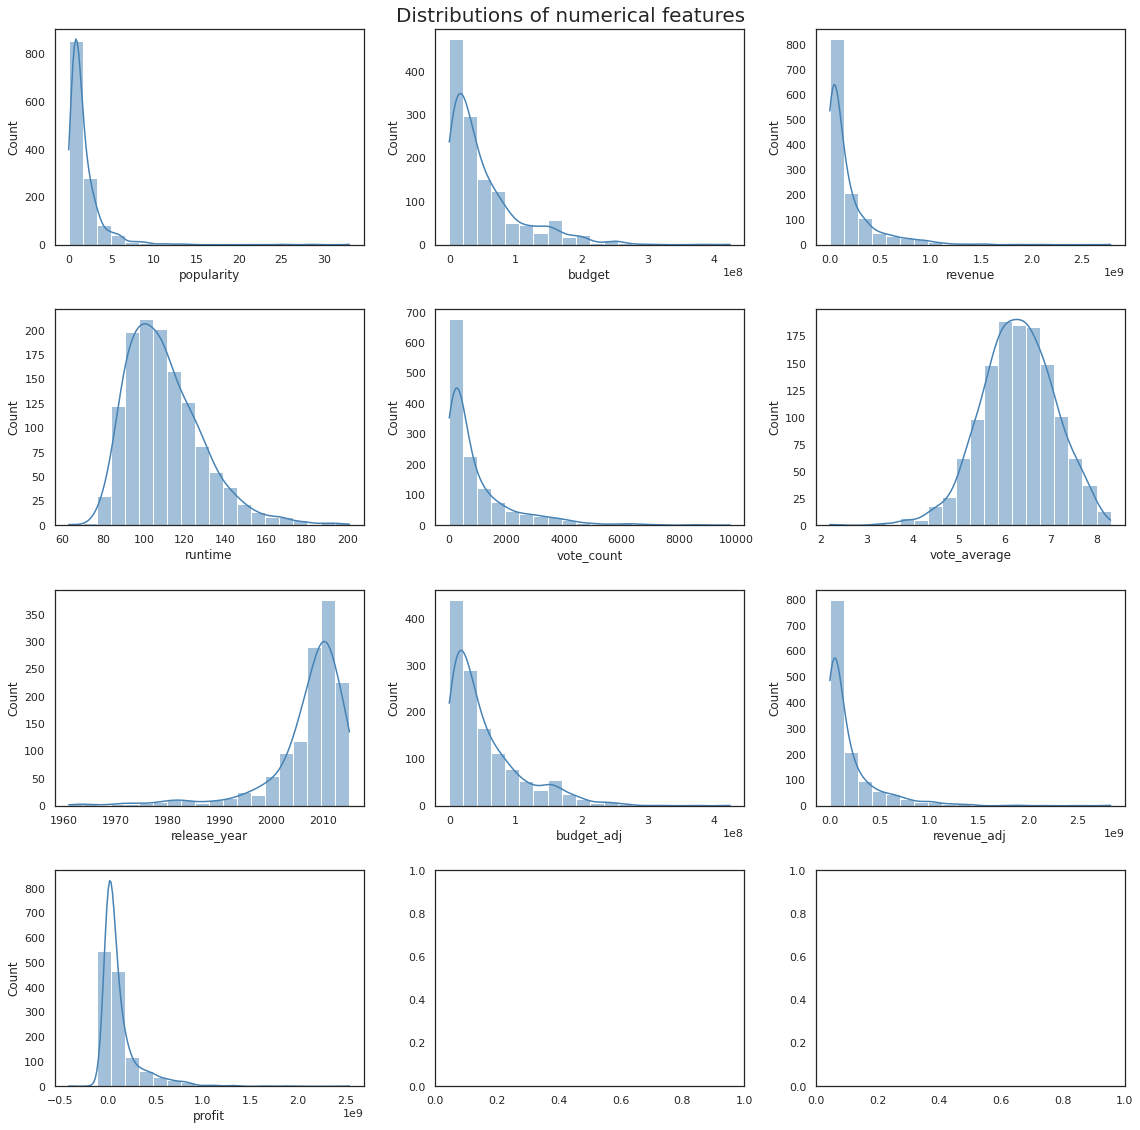

In [1811]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 16))
for col, ax in zip(num_cols, axes.flat):
    sns.histplot(x=col, data=dataset, bins=20, kde=True, ax=ax, color='steelblue')
fig.suptitle('Distributions of numerical features', fontsize=20)
plt.tight_layout(h_pad=2)

#save_fig("num_cols_distribution_plots")

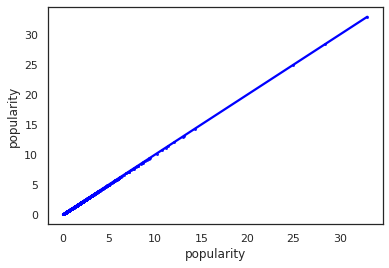

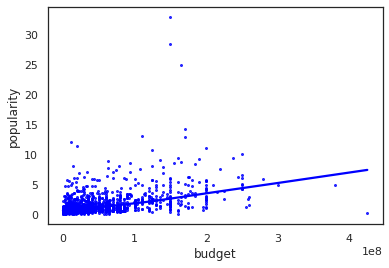

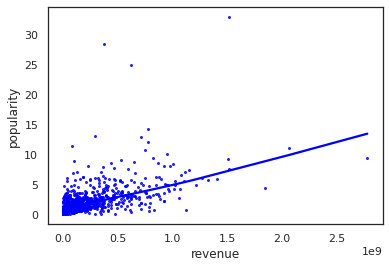

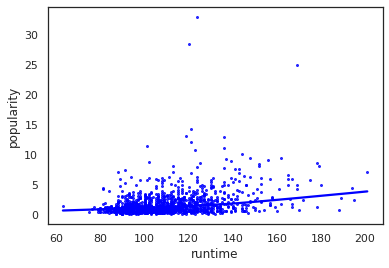

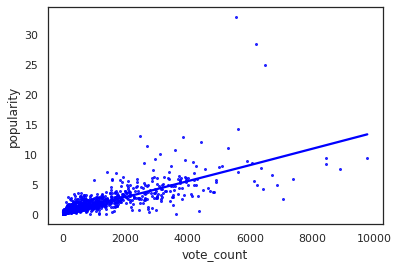

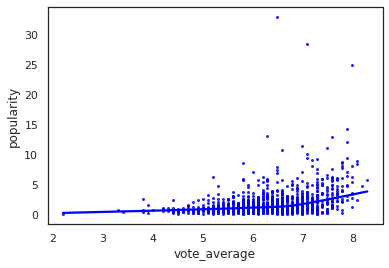

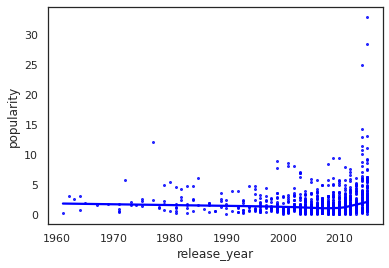

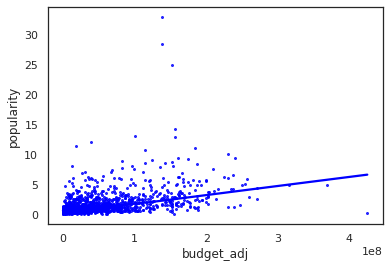

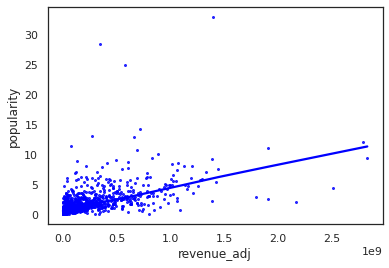

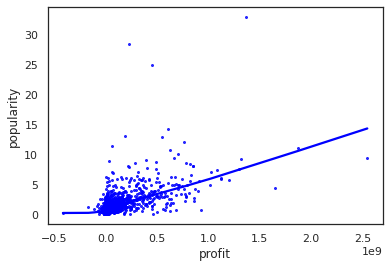

In [1812]:
for col in num_cols:
    sns.regplot(data=dataset, x=col, y="popularity", lowess=True, scatter=True, color='blue',scatter_kws={'s': 4, 'marker': '.'})
    plt.show()

next we find the relationship between popularity and target group popularity_level

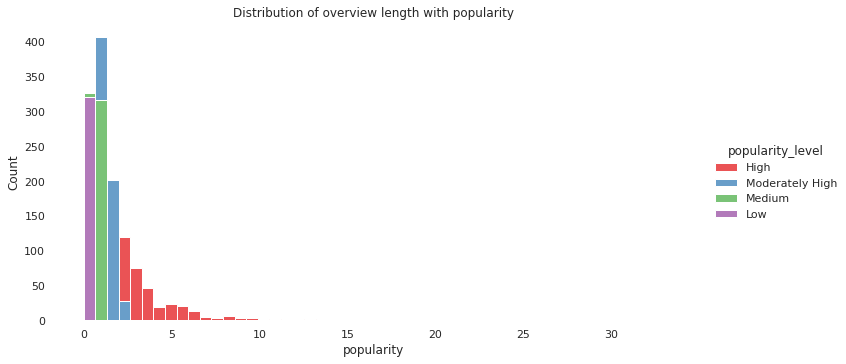

In [1813]:
sns.displot(data=dataset, kind='hist', x='popularity', hue='popularity_level', bins=50,
            multiple='stack', height=5, aspect=2, palette='Set1')
sns.despine(left=True, bottom=True)
plt.title('Distribution of overview length with popularity');

popularity is feature directly related to target (to exclude), we consider budget revenue, runtime, vote_count as training features

In [1814]:
training_features = ["budget", "revenue","runtime","vote_count", "vote_average", "profit"]

### Vsualization of target groups

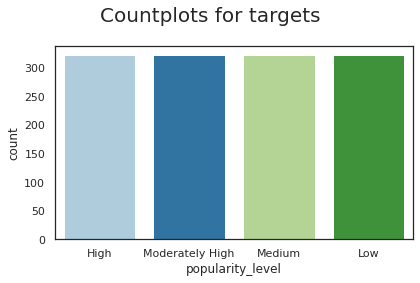

In [1815]:
# see target spread
sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
sns.countplot(x=dataset["popularity_level"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()

target groups are evenly spread, this is a balanced dataset

### Visualization of movie over time

In [1816]:
dataset['release_date'] = pd.to_datetime(dataset['release_date'])

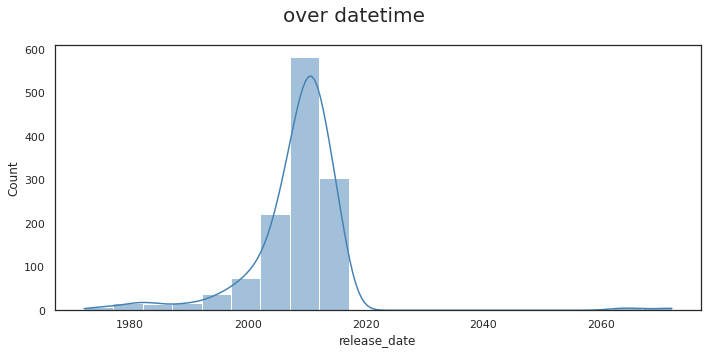

In [1817]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.histplot(x='release_date', data=dataset, bins=20, kde=True, ax=ax, color='steelblue')
fig.suptitle('over datetime', fontsize=20)
plt.tight_layout(h_pad=2)

notice that there are erroneous entries, we nee to correct the entries based on their years

In [1818]:
max_date_threshold =  pd.to_datetime('2024-03-30')

In [1819]:
dataset.loc[dataset["release_date"] >= max_date_threshold]

,Unnamed: 0,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,popularity_level
1259,9849,646,tt0055928,3.170651,1100000.0,59600000.0,Dr. No,Sean Connery|Ursula Andress|Joseph Wiseman|Jac...,http://www.mgm.com/view/movie/566/Dr.-No/,Terence Young,NOW meet the most extraordinary gentleman spy ...,london|england|assassination|spy|casino,"In the film that launched the James Bond saga,...",110,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM),2062-10-04,560,6.7,1962,7.929294e+06,4.296236e+08,58500000.0,High
1260,9881,658,tt0058150,3.153791,3500000.0,124900000.0,Goldfinger,Sean Connery|Honor Blackman|Gert FrÃ¶be|Shirle...,http://www.mgm.com/view/movie/760/Goldfinger/,Guy Hamilton,Everything he touches turns into excitement!,secret organization|secret intelligence servic...,Special agent 007 (Sean Connery) comes face to...,110,Adventure|Action|Thriller,Eon Productions|Metro-Goldwyn-Mayer (MGM),2064-09-17,602,7.0,1964,2.460594e+07,8.780804e+08,121400000.0,High
1261,9884,704,tt0058182,0.812194,500000.0,1000549.0,A Hard Day's Night,John Lennon|Paul McCartney|George Harrison|Rin...,http://www.thebeatles.com/film/hard-days-night,Richard Lester,"The Beatles, starring in their first full-leng...",adolescence|culture clash|press conference|beh...,"Capturing John Lennon, Paul McCartney, George ...",88,Comedy|Music,Proscenium Films|Walter Shenson Films|Maljack ...,2064-07-06,92,6.9,1964,3.515134e+06,7.034127e+06,500549.0,Medium
1262,9925,681,tt0066995,1.755117,7200000.0,116000000.0,Diamonds Are Forever,Sean Connery|Jill St. John|Charles Gray|Lana W...,http://www.mgm.com/view/movie/529/Diamonds-Are...,Guy Hamilton,The man who made 007 a household number,satellite|plastic surgery|smuggling|murder|ext...,Diamonds are stolen only to be sold again in t...,120,Adventure|Action|Thriller|Science Fiction,Eon Productions|Metro-Goldwyn-Mayer (MGM)|Danjaq,2071-12-13,331,6.2,1971,3.877340e+07,6.246826e+08,108800000.0,Moderately High
1263,9927,984,tt0066999,0.885391,4000000.0,35976000.0,Dirty Harry,Clint Eastwood|Harry Guardino|Reni Santoni|Joh...,http://www.warnerbros.com/dirty-harry/,Don Siegel,Detective Harry Callahan. He doesn't break mur...,ambush|san francisco|detective|ransom|stadium,"When a madman dubbed the ""Scorpio Killer"" terr...",102,Action|Crime|Thriller,Warner Bros.|Malpaso Company,2071-12-22,300,7.2,1971,2.154078e+07,1.937378e+08,31976000.0,Medium
1264,9932,636,tt0066434,0.627942,777000.0,2437000.0,THX 1138,Robert Duvall|Donald Pleasence|Don Pedro Colle...,http://www.thx1138movie.com/,George Lucas,Visit the future where love is the ultimate cr...,prison|drug addiction|hearing|totalitarian reg...,People in the future live in a totalitarian so...,86,Drama|Mystery|Science Fiction|Thriller,American Zoetrope|Warner Bros.,2071-03-11,125,6.1,1971,4.184296e+06,1.312372e+07,1660000.0,Low
1265,9951,25188,tt0067328,0.369308,1300000.0,29133000.0,The Last Picture Show,Timothy Bottoms|Jeff Bridges|Cybill Shepherd|B...,http://www.filmsite.org/lastp.html,Peter Bogdanovich,"Anarene, Texas, 1951. Nothing much has changed...",new love|graduation|high school graduation|poo...,The coming of age of a youth named Sonny in a ...,118,Drama,Columbia Pictures Corporation|BBS Productions,2071-10-03,42,7.0,1971,7.000753e+06,1.568869e+08,27833000.0,Low
1270,10131,430,tt0055256,0.303783,3000000.0,4000000.0,"One, Two, Three",James Cagney|Liselotte Pulver|Horst Buchholz|P...,"http://en.wikipedia.org/wiki/One,_Two,_Three",Billy Wilder,Billy Wilder's Explosive New Comedy,berlin|prison|clerk|atlanta|cold war,"One, Two, Three â€“ A scorching business comed...",115,Comedy|Family,The Mirisch Corporation,2061-12-15,30,7.5,1961,2.188458e+07,2.917944e+07,1000000.0,Low
1278,10401,667,tt0062512,1.554808,9500000.0,111584787.0,You Only Live Twice,Sean Connery|Akiko Wakabayashi|Karin Dor|Mie H...,http://w

In [1820]:
for index, row in dataset.loc[dataset["release_date"] >= max_date_threshold].iterrows():
    dataset.at[index,"release_date"] = pd.to_datetime(f'{str(row["release_year"])}-{str(row["release_date"].month)}-{str(row["release_date"].day)}')

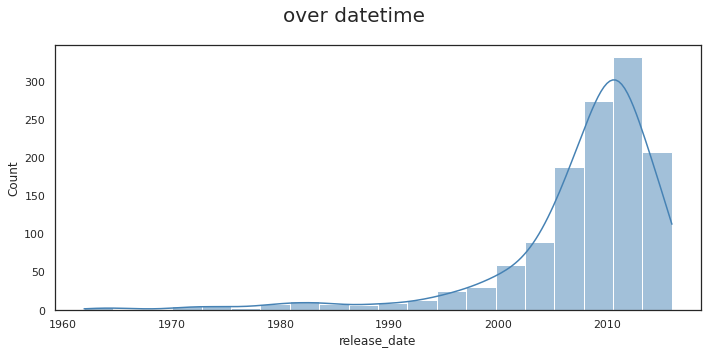

In [1821]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.histplot(x='release_date', data=dataset, bins=20, kde=True, ax=ax, color='steelblue')
fig.suptitle('over datetime', fontsize=20)
plt.tight_layout(h_pad=2)

### Visualize target group over release_year

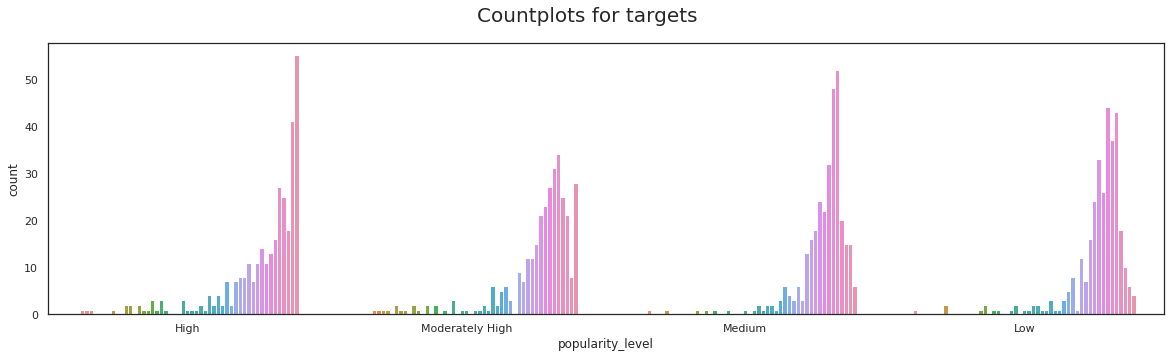

In [1822]:
sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["release_year"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
ax.legend_.remove()

we can see that there are minor difference across years (pink is most recent, with blue and orange in the past), movies created recently seems to have higher ratings, this could be due to better visual effects etc, however we should not consider this as training feature because popularity levels are derived from comparison of movies of same timeframe, hence it is more likely that as years goes ratings are higher due to other factors

hence we need to take care of this using time series kfold later on

### Extracting month in datetime and visualize

In [1823]:
dataset["release_month"] = dataset["release_date"].apply(lambda x : x.month)

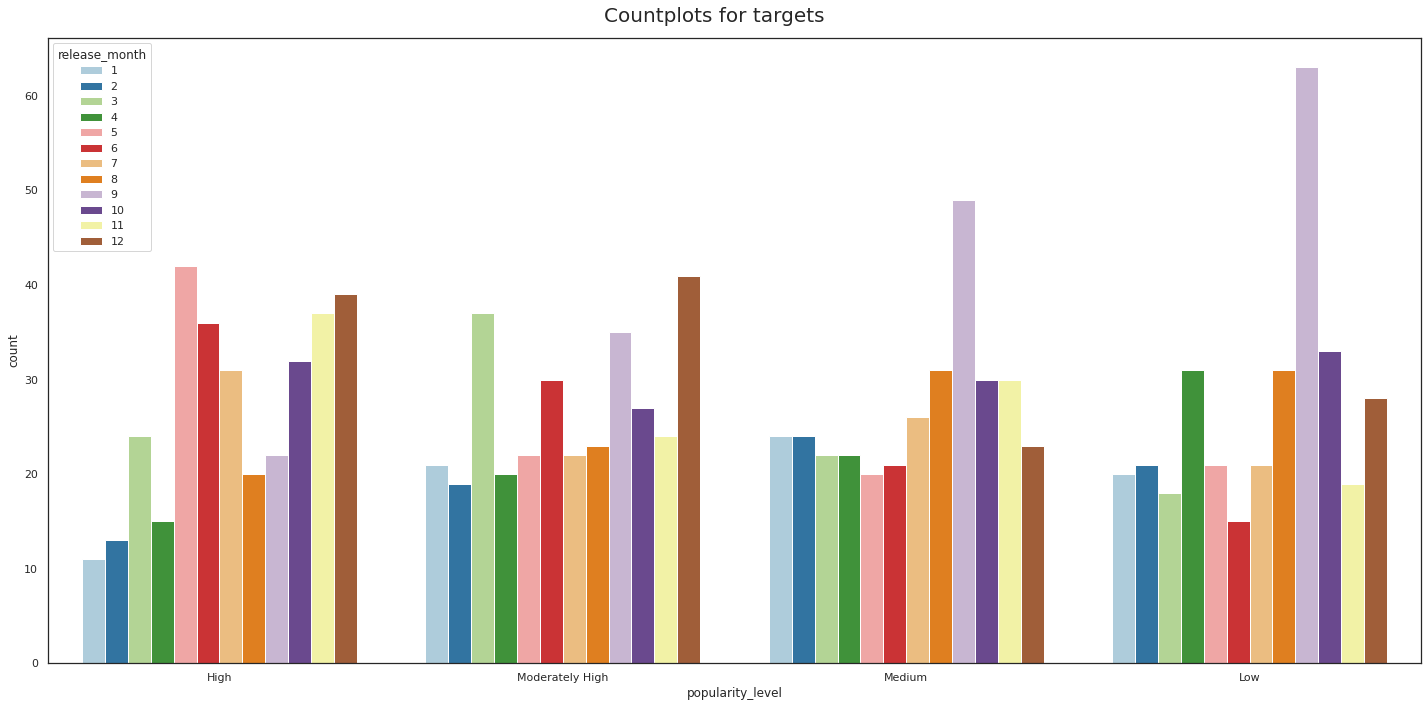

In [1824]:
sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
sns.countplot(x=dataset["popularity_level"], hue=dataset["release_month"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

we see some months have abnomally low /medium ratings such as september, while some have higher ratings such as may, this may be due to many unknown but chronic factors hence this could be us as a training feature

In [1825]:
training_features.append("release_month")

### Handling categorical features and feature extraction

Before we conduct feature extraction, we will need to split the dataset into train and test set so as not to cause information leakage, which will cause us to obtain a better than actual performance

In [1826]:
from sklearn.model_selection import train_test_split

dataset_train, dataset_test = train_test_split(dataset, test_size=0.1, random_state=42)
dataset_orig = dataset.copy()
dataset = dataset_train.copy()

In [1827]:
dataset = dataset.reset_index(drop = True)
dataset = dataset.reset_index()

In [1828]:
dataset

,index,Unnamed: 0,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,popularity_level,release_month
0,0,3610,62837,tt1564349,0.455555,37000000.0,95404397.0,Dolphin Tale,Morgan Freeman|Ashley Judd|Harry Connick Jr.|N...,http://dolphintalemovie.warnerbros.com/index.html,Charles Martin Smith,Inspired by the amazing true story of Winter.,dolphin|boy|animal in title|trap|summer,A story centered on the friendship between a b...,113,Drama|Family,Alcon Entertainment|Arc Productions,2011-09-23,103,6.6,2011,3.586773e+07,9.248484e+07,58404397.0,Low,9
1,1,8375,85,tt0082971,4.578300,18000000.0,389925971.0,Raiders of the Lost Ark,Harrison Ford|Karen Allen|Paul Freeman|Ronald ...,http://www.indianajones.com,Steven Spielberg,Indiana Jones - the new hero from the creators...,saving the world|riddle|nepal|himalaya|cairo,When Dr. Indiana Jones â€“ the tweed-suited pr...,115,Adventure|Action,Lucasfilm|Paramount Pictures,1981-06-12,2506,7.5,1981,4.316743e+07,9.351169e+08,371925971.0,High,6
2,2,1957,23168,tt0840361,1.614028,37000000.0,154026136.0,The Town,Ben Affleck|Rebecca Hall|Jeremy Renner|Jon Ham...,http://thetownmovie.warnerbros.com/,Ben Affleck,Welcome to the bank robbery capital of America.,money laundering|ambulance|boston|massachusett...,"Doug MacRay is a longtime thief, who, smarter ...",125,Crime|Drama|Thriller,Legendary Pictures|GK Films|Thunder Road Pictu...,2010-09-15,930,6.9,2010,3.700000e+07,1.540261e+08,117026136.0,Moderately High,9
3,3,5423,49047,tt1454468,5.242753,105000000.0,716392705.0,Gravity,Sandra Bullock|George Clooney|Ed Harris|Orto I...,http://gravitymovie.warnerbros.com/,Alfonso CuarÃ³n,Don't Let Go,space mission|space|astronaut|trapped in space|3d,"Dr. Ryan Stone (Sandra Bullock), a brilliant m...",91,Science Fiction|Thriller|Drama,Warner Bros.|Heyday Films|Esperanto Filmoj,2013-09-27,3775,7.4,2013,9.828350e+07,6.705675e+08,611392705.0,High,9
4,4,6687,9682,tt0454919,0.614854,38000000.0,29907685.0,Pulse,Kristen Bell|Ian Somerhalder|Christina Milian|...,http://www.pulsethemovie.net/,Jim Sonzero,You are now infected.,suicide|hacker|death of a friend|website,When their computer hacker friend accidentally...,90,Horror|Thriller,Dimension Films,2006-08-11,71,5.1,2006,4.110343e+07,3.235022e+07,-8092315.0,Low,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152,1152,6986,36648,tt0359013,1.792138,65000000.0,128905366.0,Blade: Trinity,Wesley Snipes|Kris Kristofferson|Dominic Purce...,http://www.warnerbros.com/blade-trinity,David S. Goyer,The final hunt begins.,dracula|comic book|fistfight|superhero|martial...,"For years, Blade has fought against the vampir...",123,Science Fiction|Action|Horror|Thriller|Adventure,New Line Cinema|Amen Ra Films|Shawn Danielle P...,2004-12-08,800,5.7,2004,7.503895e+07,1.488142e+08,63905366.0,Moderately High,12
1153,1153,7412,13885,tt0408236,1.846602,50000000.0,152000000.0,Sweeney Todd: The Demon Barber of Fleet Street,Johnny Depp|Helena Bonham Carter|Alan Rickman|...,http://www.sweeneytoddmovie.com/,Tim Burton,Never Forget. Never Forgive.,confession|corset|asylum|razor|villain,"The infamous story of Benjamin Barker, a.k.a S...",116,Drama|Horror|Music,Warner Bros.|DreamWorks Pictures|Tim Burton Pr...,2007-12-20,971,6.8,2007,5.258343e+07,1.598536e+08,102000000.0,Moderately High,12
1154,1154,7482,5857,tt0897361,0.811539,12000000.0,9620399.0,I Know Who Killed Me,Lindsay Lohan|Julia Ormond|Neal McDonough|Bria...,http://sonypictures.com/homevideo/iknowwhokill...,Chris Sivertson,There are two sides to every crime.,sadistic|seduction|college|striptease|sadism,An idyllic small town is rocked when Aubrey Fl...,105,Crime|Horror|Mystery|Thriller,TriStar Pictures|360 Pictures,2007-07-27,44,3.8,2007,1.262002e+07,1.011747e+07,-2379601.0,Medium,7
1155,1155,5442,47964,tt1606378,2.815499,920000

In [1829]:
dataset[cat_cols].head(1)

,imdb_id,original_title,cast,homepage,director,tagline,keywords,overview,genres,production_companies,release_date,popularity_level
0,tt1564349,Dolphin Tale,Morgan Freeman|Ashley Judd|Harry Connick Jr.|N...,http://dolphintalemovie.warnerbros.com/index.html,Charles Martin Smith,Inspired by the amazing true story of Winter.,dolphin|boy|animal in title|trap|summer,A story centered on the friendship between a b...,Drama|Family,Alcon Entertainment|Arc Productions,2011-09-23,Low


In [1830]:
dataset.iloc[0]["overview"]

'A story centered on the friendship between a boy and a dolphin whose tail was lost in a crab trap.'

from the above, we can see that we need to do some feature extraction from the columns to generate meaningful categories

- length of title - The length of a movie title may influence how audiences perceive the film. A shorter, catchy title might be more memorable and easier to recall, potentially leading to increased interest and viewership. On the other hand, a longer title might convey more information about the movie's content or theme, which could attract specific audiences but might also be seen as less accessible to others.

- length of tagline - Short and catchy taglines are often more memorable and impactful. They can succinctly capture the essence of the movie and leave a lasting impression on audiences. A well-crafted short tagline might generate curiosity and interest, potentially leading to higher ratings as viewers are intrigued to watch the film. The length of a tagline can affect its ability to communicate the movie's theme or premise effectively. A concise tagline can quickly convey the central idea or emotion of the film, making it easier for audiences to understand what to expect. However, if a tagline is too short or cryptic, it might fail to provide enough information, leading to confusion or misinterpretation.

- length of overview - A succinct overview that effectively summarizes the movie's plot, themes, and key elements can enhance audience understanding and engagement. If the overview is too lengthy or convoluted, it may fail to communicate the movie's core aspects clearly, potentially leading to confusion and dissatisfaction among viewers. The length of the overview can influence audience expectations regarding the movie's content and quality. A well-written and comprehensive overview can provide insight into what viewers can expect from the film, helping to manage expectations and increase the likelihood of a positive reception. Conversely, a brief or vague overview may not adequately convey the movie's appeal, leading to disappointment and lower ratings.

In [1831]:
def getlength(x):
    words = x.split()
    return len(words)

In [1832]:
dataset["title length"] = dataset["original_title"].apply(lambda x: getlength(x))
dataset["tagline length"] = dataset["tagline"].apply(lambda x: getlength(x))
dataset["overview length"] = dataset["overview"].apply(lambda x: getlength(x))

In [1833]:
colA= ["title length","tagline length","overview length"] 

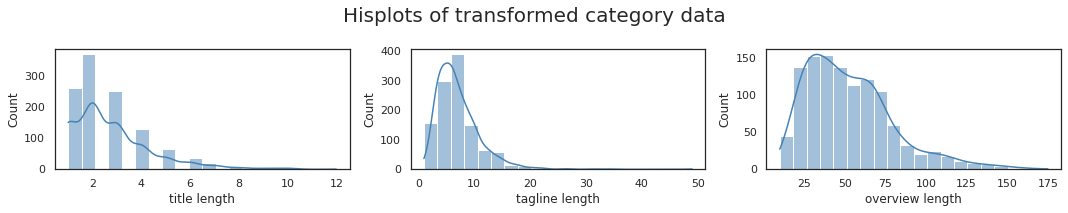

In [1834]:
sns.set_palette('Paired')
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))
for i, ax in enumerate(axes.flat):
    sns.histplot(x=colA[i],data = dataset, bins = 20, kde = True, ax=ax, color= 'steelblue')
fig.suptitle('Hisplots of transformed category data', fontsize=20)
plt.tight_layout()

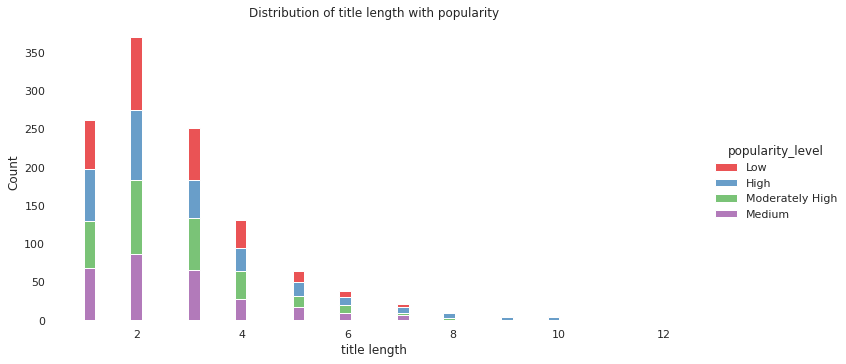

In [1835]:
sns.displot(data=dataset, kind='hist', x='title length', hue='popularity_level', bins=50,
            multiple='stack', height=5, aspect=2, palette='Set1')
sns.despine(left=True, bottom=True)
plt.title('Distribution of title length with popularity');

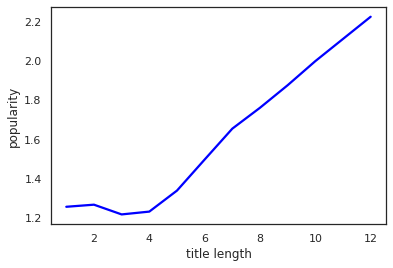

In [1836]:
sns.regplot(data=dataset, x='title length', y="popularity", lowess=True, scatter=False, color='blue')
plt.show()

title length not useful

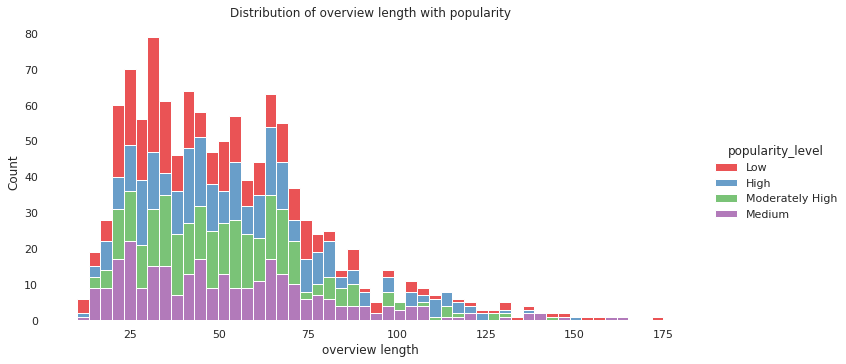

In [1837]:
sns.displot(data=dataset, kind='hist', x='overview length', hue='popularity_level', bins=50,
            multiple='stack', height=5, aspect=2, palette='Set1')
sns.despine(left=True, bottom=True)
plt.title('Distribution of overview length with popularity');

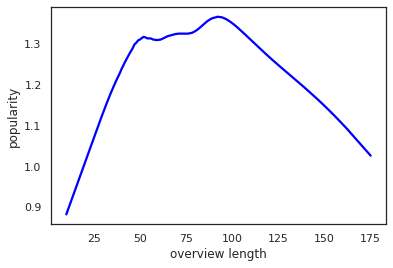

In [1838]:
sns.regplot(data=dataset, x='overview length', y="popularity", lowess=True, scatter=False, color='blue')
plt.show()

overview length might be useful

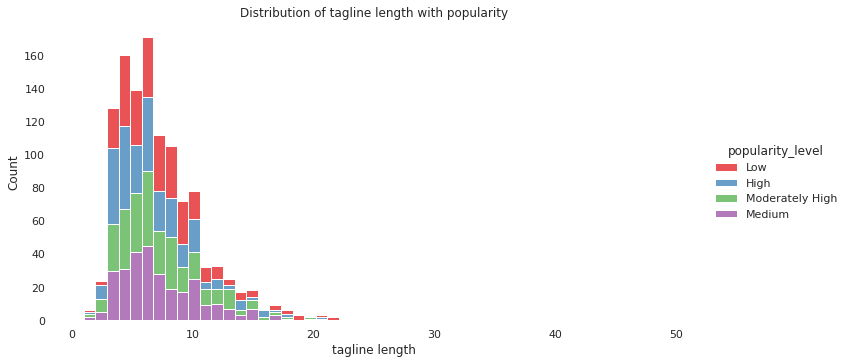

In [1839]:
sns.displot(data=dataset, kind='hist', x='tagline length', hue='popularity_level', bins=50,
            multiple='stack', height=5, aspect=2, palette='Set1')
sns.despine(left=True, bottom=True)
plt.title('Distribution of tagline length with popularity');

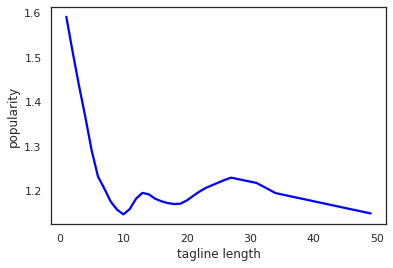

In [1840]:
sns.regplot(data=dataset, x='tagline length', y="popularity", lowess=True, scatter=False, color='blue')
plt.show()

tagline length is very useful, one reason is that short tagline is more catchy and memorizable and impressionable

In [1841]:
#training_features.append("title length")
training_features.append("tagline length")
training_features.append("overview length")

In [1842]:
training_features

['budget',
 'revenue',
 'runtime',
 'vote_count',
 'vote_average',
 'profit',
 'release_month',
 'tagline length',
 'overview length']

### One hot encoding important category features

Next, we one hot encode the following

- cast
- director
- keywords
- genres
- production_companies

In [1843]:
def onehotencode(dataset,col):
    df = pd.DataFrame()
    df[col] = dataset[col].str.split('|')
    one_hot_encoded = pd.get_dummies(df[col].apply(pd.Series).stack()).sum(level=0)
    return one_hot_encoded

In [1844]:
OHE_cast = onehotencode(dataset,"cast")

lets take a look at the movies Chris Pratt acted in

In [1845]:
dataset.iloc[OHE_cast.loc[OHE_cast["Chris Pratt"] != 0].index]

,index,Unnamed: 0,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit,popularity_level,release_month,title length,tagline length,overview length
5,5,4414,97630,tt1790885,1.554441,40000000.0,1.328207e+08,Zero Dark Thirty,Jessica Chastain|Jason Clarke|Mark Strong|Joel...,http://www.zerodarkthirty-movie.com/site/,Kathryn Bigelow,The Greatest Manhunt in History,assassination|cia|hotel|terrorist|prisoner,A chronicle of the decade-long hunt for al-Qae...,157,Thriller|Drama|History,Columbia Pictures|Annapurna Pictures|First Lig...,2012-12-19,1240,6.5,2012,3.798977e+07,1.261457e+08,9.282072e+07,Moderately High,12,3,5,33
299,299,3448,63492,tt0770703,1.120851,20000000.0,3.042610e+07,What's Your Number?,Chris Evans|Anna Faris|Martin Freeman|Chris Pr...,http://www.whatsyournumbermovie.com/,Mark Mylod,Ally's looking for the best ex of her life.,based on novel|loser|magazine|womanizer|mission,Ally Darling (Anna Faris) is realizing she's a...,106,Comedy|Romance,Regency Enterprises|Contrafilm|New Regency Pic...,2011-09-30,390,6.2,2011,1.938796e+07,2.949500e+07,1.042610e+07,Medium,9,3,9,81
300,300,3457,60308,tt1210166,1.081676,50000000.0,1.102062e+08,Moneyball,Brad Pitt|Jonah Hill|Robin Wright|Philip Seymo...,http://www.moneyball-movie.com/,Bennett Miller,What are you really worth?,underdog|based on novel|baseball|teamwork|partner,The story of Oakland Athletics general manager...,133,Drama,Columbia Pictures|Scott Rudin Productions,2011-09-22,899,6.9,2011,4.846990e+07,1.068337e+08,6.020622e+07,Medium,9,1,5,28
307,307,1454,10521,tt0901476,1.074072,30000000.0,1.146635e+08,Bride Wars,Anne Hathaway|Kate Hudson|Bryan Greenberg|Chri...,http://www.bridewars.com,Gary Winick,May the best bride win,bride|friendship|engagement|rivalry|wedding,Two best friends become rivals when their resp...,89,Comedy,Dune Entertainment|Regency Enterprises|Fox 200...,2009-01-09,501,5.8,2009,3.049201e+07,1.165440e+08,8.466346e+07,Medium,1,2,5,16
445,445,630,118340,tt2015381,14.311205,170000000.0,7.733124e+08,Guardians of the Galaxy,Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...,http://marvel.com/guardians,James Gunn,All heroes start somewhere.,marvel comic|spaceship|space|scene during end ...,"Light years from Earth, 26 years after being a...",121,Action|Science Fiction|Adventure,Marvel Studios|Moving Picture Company (MPC)|Bu...,2014-07-30,5612,7.9,2014,1.565855e+08,7.122911e+08,6.033124e+08,High,7,4,4,28
534,534,4446,72207,tt1195478,1.095479,30000000.0,5.390975e+07,The Five-Year Engagement,Emily Blunt|Alison Brie|Jason Segel|Rhys Ifans...,http://www.thefiveyearengagementmovie.com/,Nicholas Stoller,A comedy about the journey between popping the...,sex|san francisco|restaurant|frustration|chase,"Exactly one year after Tom meets Violet, he su...",124,Comedy,Universal Pictures|Dentsu|Relativity Media|Apa...,2012-04-27,319,5.6,2012,2.849233e+07,5.120048e+07,2.390975e+07,Medium,4,3,13,43
541,541,0,135397,tt0369610,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.363529e+09,High,6,2,4,26


In [1846]:
OHE_cast.shape

(1157, 2795)

the dimension of One hot encoded feature is too large and sparse, this is not good for subsequent training, hence we need to conduct dimensionality reduction
- PCA
- SelectKBest

### Dimension reduction - PCA

In [1847]:
# Perform PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=OHE_cast.shape[0])  # Specify the number of components you want to reduce to
pca_result = pca.fit_transform(OHE_cast)

# Create DataFrame to store PCA results
pca_df = pd.DataFrame(data=pca_result)

In [1848]:
pca_df["popularity_level"] = dataset["popularity_level"]

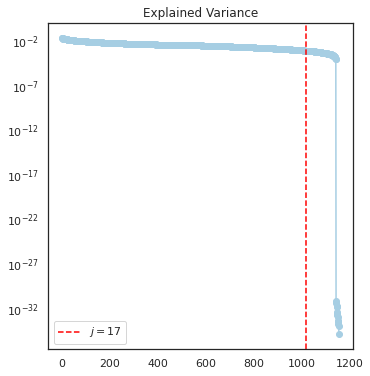

In [1849]:
fig, ax= plt.subplots(figsize=(12, 6))

plt.subplot(121)
plt.semilogy(pca.explained_variance_, '-o')
plt.axvline(x=1020, c='r', ls='--', label=r'$j=17$')
plt.title('Explained Variance')
# plt.xlim(0, 10)
# plt.ylim( 10 ** -4,  1)
plt.legend()

notice that the explained variance do not drop at first few principal components, this indicates PCA is not ideal in this context, nevertheless we try to visualize PCA results

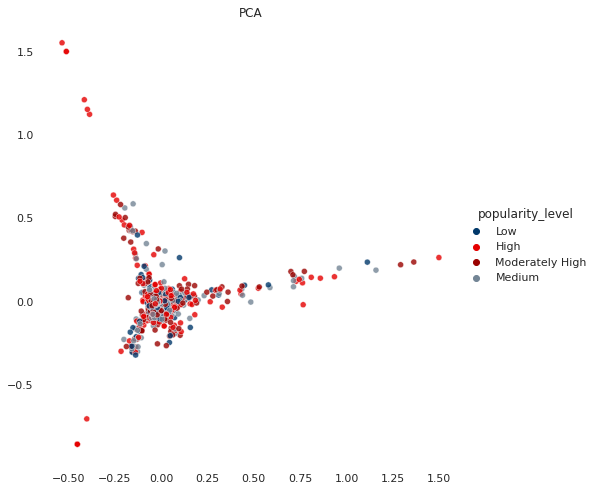

In [1850]:
sns.relplot(x=pca_df[0], y=pca_df[1], hue=pca_df["popularity_level"], kind='scatter', height=7, alpha=0.8, 
           palette={'Low':sns.xkcd_rgb['marine blue'],
                    'Medium':sns.xkcd_rgb['steel'],
                    "Moderately High" : sns.xkcd_rgb['deep red'],
                    "High" : sns.xkcd_rgb["red"]
                   }
           )
plt.title('PCA')
plt.xlabel('')
plt.ylabel('')
plt.box(False);

### Dimension reduction - SelectKbest

In [1851]:
from sklearn.feature_selection import SelectKBest, chi2

# Perform feature selection using SelectKBest with chi-squared test
k = 50 # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k)
selected_features = selector.fit_transform(OHE_cast, dataset["popularity_level"]) 

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_cast = OHE_cast.columns[selected_indices]
selected_cast = selected_cast.tolist()

In [1852]:
selected_cast

['Alicia Vikander',
 'Angela Bassett',
 'Brooke Shields',
 'Carrie Fisher',
 'Chris Hemsworth',
 'Daniel Radcliffe',
 'David Wenham',
 'Denis Leary',
 'Emma Watson',
 'Graham McTavish',
 'Harrison Ford',
 'Harry Connick Jr.',
 'Helena Bonham Carter',
 'Hugo Weaving',
 'Ian McDiarmid',
 'Ian McKellen',
 'James Gandolfini',
 'Jeff Goldblum',
 'Jordana Brewster',
 'Josh Duhamel',
 'Julia Roberts',
 'Katie Featherston',
 'Lea Thompson',
 'Leonardo DiCaprio',
 'Liam Hemsworth',
 'Lily Collins',
 'Mark Hamill',
 'Matt Lanter',
 'Michael Caine',
 'Michael J. Fox',
 'Natalie Portman',
 'Orlando Bloom',
 'Paul Schneider',
 'Ray Romano',
 'Richard Armitage',
 'Rob Corddry',
 'Roger Moore',
 'Rupert Grint',
 'Sacha Baron Cohen',
 'Sara Paxton',
 'Scarlett Johansson',
 'Seth Rogen',
 'Sheri Moon Zombie',
 'Spencer Breslin',
 'Stellan SkarsgÃ¥rd',
 'Taylor Lautner',
 'Theo James',
 'Timothy Spall',
 'Ty Burrell',
 'Will Arnett']

observing the selected top 50 cast, we can easily observe that they are all names of recognizable famous actors, lets count the movies they acted in


In [1853]:
def countmovies(x, df):
    count = df.loc[df[x] != 0][x].count()
    return count

In [1854]:
df_cast = pd.DataFrame(selected_cast, columns= ["cast"])
df_cast["number of movies"] = df_cast["cast"].apply(lambda x: countmovies(x,OHE_cast))
df_cast = df_cast.sort_values(by = "number of movies", ascending = False)

In [1855]:
df_cast

,cast,number of movies
10,Harrison Ford,14
41,Seth Rogen,12
40,Scarlett Johansson,12
30,Natalie Portman,11
20,Julia Roberts,10
28,Michael Caine,10
5,Daniel Radcliffe,9
23,Leonardo DiCaprio,9
8,Emma Watson,9
15,Ian McKellen,9


In [1856]:
def getpopcast(x, indexlist):
    if x in indexlist:
        return 1
    else:
        return 0

In [1857]:
mlist = []
for cast in df_cast['cast'].tolist():
    index = OHE_cast.loc[OHE_cast[cast] != 0 ].index.tolist()
    mlist.append(index)
mlist = [item for sublist in mlist for item in sublist]

dataset["bigimpact cast"] = dataset["index"].apply(lambda x : getpopcast(x, mlist))

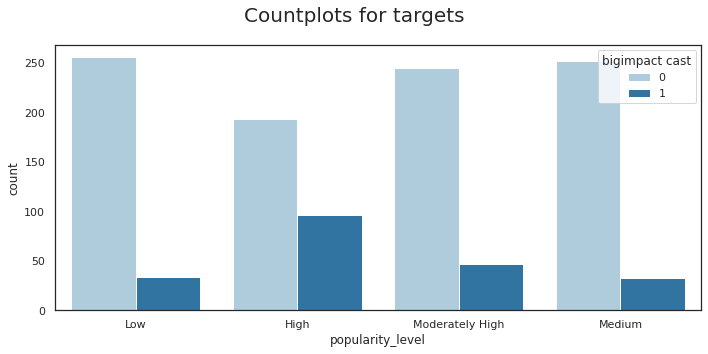

In [1858]:
sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["bigimpact cast"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

the significance of these top 10 actors are that they either acted in very good movies or very bad movies

- because kbest also select bad actors, we need to account for this

In [1859]:
badcast = []
for casts in dataset.loc[(dataset["bigimpact cast"] != 0)&(dataset["popularity_level"] == "Low")]["cast"].values:
    casts = casts.split("|")
    badcast.append(casts)
badcast = [item for sublist in badcast for item in sublist]
badcast = set(badcast)

badcast2 = {}
for cast in df_cast['cast'].tolist():
    if cast in badcast:
        index = OHE_cast.loc[OHE_cast[cast] != 0 ].index.tolist()
        badcast2[cast] = dataset.iloc[index]["popularity"].mean()

In [1860]:
badcast2

{'Seth Rogen': 1.312522416666665,
 'Scarlett Johansson': 4.01804275,
 'Natalie Portman': 2.9510915454545454,
 'Julia Roberts': 1.464708399999999,
 'Daniel Radcliffe': 4.096076,
 'Leonardo DiCaprio': 4.2182127777777785,
 'Emma Watson': 4.405361111111111,
 'Angela Bassett': 0.3812985,
 'Sara Paxton': 0.48618433333333333,
 'Spencer Breslin': 0.5192066666666667,
 'Sheri Moon Zombie': 0.52835,
 'Paul Schneider': 0.5406433333333334,
 'Jordana Brewster': 0.5131473333333333,
 'Harry Connick Jr.': 0.469279,
 'Brooke Shields': 0.369615}

as we can see, some popular cast are in the bad cast candidates, we need to remove them. we keep cast with average popularity of less than dataset's average in bad cast list

In [1861]:
final_badcast = []
final_goodcast = []
for i,v in badcast2.items():
    if v < dataset["popularity"].mean():
        final_badcast.append(i)
    else:
        final_goodcast.append(i)

In [1862]:
mlist = []
for cast in final_badcast:
    index = OHE_cast.loc[OHE_cast[cast] != 0 ].index.tolist()
    mlist.append(index)
mlist = [item for sublist in mlist for item in sublist]

dataset["bad cast"] = dataset["index"].apply(lambda x : getpopcast(x, mlist))

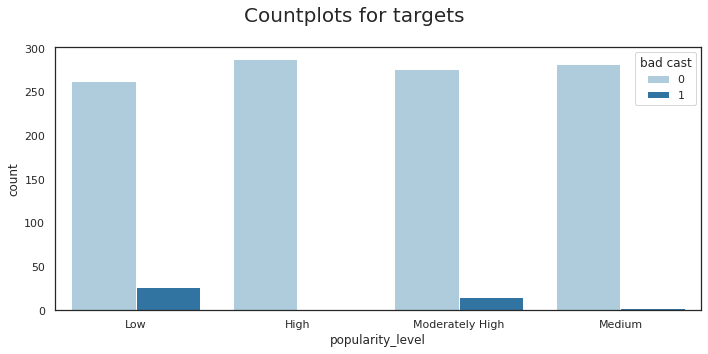

In [1863]:
sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["bad cast"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

from the above, we observe that bad cast is not a useful feature, this may be because having bad cast does not mean movie cannot have good cast as seen in the moderately high group, furthermore bad cast account for low percentage of Low ratings

### Dimension reduction - based on prior knowledge to get good cast

based on prior knowledge, we know that actors that acted in more movies are likely more popular and movies tend to have better ratings, so we are also interested actors that acted in many movies, we set the threshold at top 10 actors

In [1864]:
all_cast = OHE_cast.columns.tolist()
df_allcast = pd.DataFrame(all_cast, columns= ["cast"])
df_allcast["number of movies"] = df_allcast["cast"].apply(lambda x: countmovies(x,OHE_cast))
df_allcast = df_allcast.sort_values(by = "number of movies", ascending = False)

In [1865]:
df_allcast.head(100)

,cast,number of movies
1814,Matt Damon,19
1783,Mark Wahlberg,18
1211,Jason Statham,15
2359,Samuel L. Jackson,15
2628,Tom Hanks,14
...,...,...
780,Ed Harris,8
1003,Gwyneth Paltrow,8
446,Channing Tatum,8
2576,Terrence Howard,8


we will cut off at 10 movies

In [1866]:
for cast in df_allcast.head(100)["cast"]:
    if df_allcast.loc[df_allcast["cast"] == cast]["number of movies"].values[0] >10:
        final_goodcast.append(cast)
final_goodcast = list(set(final_goodcast))
final_goodcast

['Rachel Weisz',
 'Seth Rogen',
 'Robert Downey Jr.',
 'Scarlett Johansson',
 'Jonah Hill',
 'Bill Nighy',
 'Colin Farrell',
 'Leonardo DiCaprio',
 'Charlize Theron',
 'Cameron Diaz',
 'Guy Pearce',
 'Mark Wahlberg',
 'Christian Bale',
 'Jason Bateman',
 'Julianne Moore',
 'James Franco',
 'Morgan Freeman',
 'Jennifer Aniston',
 'Paul Rudd',
 'Nicolas Cage',
 'Cate Blanchett',
 'Joseph Gordon-Levitt',
 'Russell Crowe',
 'Liam Neeson',
 'Bradley Cooper',
 'Harrison Ford',
 'Emma Watson',
 'Anne Hathaway',
 'Brad Pitt',
 'Jessica Chastain',
 'Jeff Bridges',
 'Steve Carell',
 'Natalie Portman',
 'Daniel Radcliffe',
 'Ben Affleck',
 'Matt Damon',
 'Jason Statham',
 'Tom Cruise',
 'Tom Hanks',
 'Elizabeth Banks',
 'George Clooney',
 'Ewan McGregor',
 'Hugh Jackman',
 'Woody Harrelson',
 'Ralph Fiennes',
 'Johnny Depp',
 'Jude Law',
 'Samuel L. Jackson',
 'Vin Diesel']

In [1867]:
OHE_cast[final_goodcast]

,Rachel Weisz,Seth Rogen,Robert Downey Jr.,Scarlett Johansson,Jonah Hill,Bill Nighy,Colin Farrell,Leonardo DiCaprio,Charlize Theron,Cameron Diaz,Guy Pearce,Mark Wahlberg,Christian Bale,Jason Bateman,Julianne Moore,James Franco,Morgan Freeman,Jennifer Aniston,Paul Rudd,Nicolas Cage,Cate Blanchett,Joseph Gordon-Levitt,Russell Crowe,Liam Neeson,Bradley Cooper,Harrison Ford,Emma Watson,Anne Hathaway,Brad Pitt,Jessica Chastain,Jeff Bridges,Steve Carell,Natalie Portman,Daniel Radcliffe,Ben Affleck,Matt Damon,Jason Statham,Tom Cruise,Tom Hanks,Elizabeth Banks,George Clooney,Ewan McGregor,Hugh Jackman,Woody Harrelson,Ralph Fiennes,Johnny Depp,Jude Law,Samuel L. Jackson,Vin Diesel
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1153,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1155,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


the reduced feature still has extremely high dimensions and sparse, hence we will need to transform it, we will categorize all movies with the actors present as 1 and without as 0

In [1868]:
mlist = []
for cast in final_goodcast:
    index = OHE_cast.loc[OHE_cast[cast] != 0 ].index.tolist()
    mlist.append(index)
mlist = [item for sublist in mlist for item in sublist]

dataset["popular cast"] = dataset["index"].apply(lambda x : getpopcast(x, mlist))

In [1869]:
dataset = dataset.sort_values(by="popularity", ascending = False)

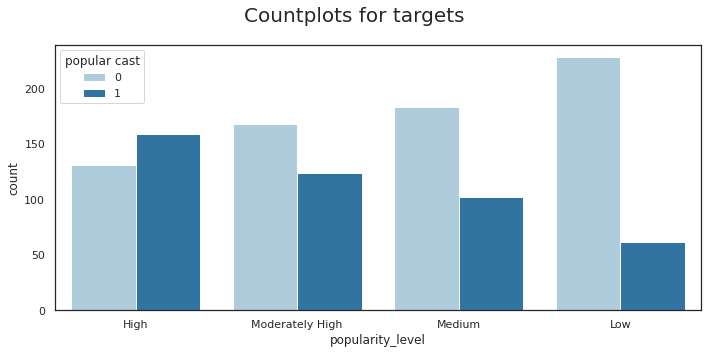

In [1870]:
sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["popular cast"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

the above plot show that we have successfully extracted a usable feature from cast

next we create a feature to calculate how many good cast in a single movie

In [1871]:
def calculategoodcast(x, final_goodcast):
    i = 0
    for goodcast in final_goodcast:
        if goodcast in x:
            i+=1
    return i

In [1872]:
dataset["num_goodcast"] = dataset["cast"].apply(lambda x : calculategoodcast(x, final_goodcast))

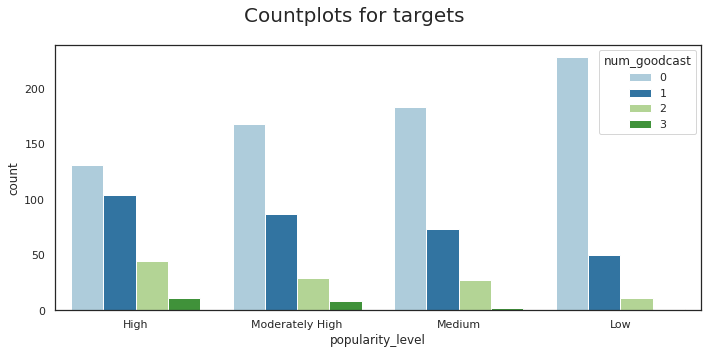

In [1873]:
sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["num_goodcast"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

we can see that num_goodcast is indeed very informative

In [1874]:
training_features.append("num_goodcast")

In [1875]:
#num: [budget, revenue, runtime, vote_count, tagline length, overview length, num_goodcast]
#cat: [release month]
#important list: final_goodcast
training_features

['budget',
 'revenue',
 'runtime',
 'vote_count',
 'vote_average',
 'profit',
 'release_month',
 'tagline length',
 'overview length',
 'num_goodcast']

### Preprocessing other cat variables

Now, we use the same methods to preprocess the other variables


### feature extraction from "director"

#### one hot encode

In [1876]:
OHE_director = onehotencode(dataset,"director")

In [1877]:
OHE_director.shape

(1157, 780)

In [1878]:
OHE_director

,Aaron Seltzer,Abe Sylvia,Adam McKay,Adam Shankman,Akiva Goldsman,Alan Parker,Alan Poul,Alan Taylor,Alastair Fothergill,Alejandro Agresti,Alejandro AmenÃ¡bar,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,Aleksander Bach,Alex Garland,Alex Gibney,Alex Kendrick,Alex Proyas,Alexander Payne,Alexandre Aja,Alfonso CuarÃ³n,Alister Grierson,Allen Hughes,Anand Tucker,Anders Anderson,Andrea Arnold,Andrew Adamson,Andrew Davis,Andrew Dominik,Andrew Erwin,Andrew Fleming,Andrew Haigh,Andrew Niccol,Andrew Stanton,Andrey Kravchuk,Andrzej Bartkowiak,Andy Fickman,Andy Muschietti,Andy Tennant,Ang Lee,Angel Gracia,Angelina Jolie,Anna Boden,Anne Fletcher,Anthony Bell,Anthony Hemingway,Anthony Minghella,Anthony Russo,Anthony Silverston,Anthony Stacchi,Antoine Fuqua,Ari Sandel,Ariel Schulman,Aristomenis Tsirbas,Art Stevens,Asger Leth,Ash Brannon,Baltasar KormÃ¡kur,Barry Cook,Barry Levinson,Barry Sonnenfeld,Baz Luhrmann,Ben Affleck,Ben Gluck,Ben Stiller,Benh Zeitlin,Bennett Miller,Bernie Goldmann,Betty Thomas,Bill Condon,Billy Ray,Billy Wilder,BjÃ¶rn Stein,Boaz Yakin,Bob Peterson,Bobby Farrelly,Bobcat Goldthwait,Brad Anderson,Brad Bird,Brad Furman,Brad Lewis,Brad Peyton,Brandon Camp,Breck Eisner,Brenda Chapman,Brett Leonard,Brett Ratner,Brian De Palma,Brian Helgeland,Brian Klugman,Brian Koppelman,Brian Levant,Brian Robbins,Brian Taylor,Bruce Beresford,Bruce Campbell,Bryan Bertino,Bryan Singer,Bryan Spicer,Burr Steers,Byron Howard,Callan Brunker,Cameron Crowe,Carlos Saldanha,Catherine Hardwicke,Chad Stahelski,Chan-wook Park,Charles Martin Smith,Chris Buck,Chris Butler,Chris Columbus,Chris Lofing,Chris Miller,Chris Morris,Chris Renaud,Chris Sanders,Chris Sivertson,Chris Wedge,Chris Weitz,Chris Williams,Christian Alvart,Christian E. Christiansen,Christophe Gans,Christopher B. Landon,Christopher McQuarrie,Christopher Miller,Christopher Nolan,Chuck Russell,Ciaran Foy,Clark Johnson,Clint Eastwood,Colin Strause,Colin Trevorrow,Conrad Vernon,Cory Edwards,Craig Brewer,Craig Gillespie,Curtis Hanson,D.J. Caruso,Damien Chazelle,Dan Bradley,Dan Gilroy,Dan Rush,Daniel Barnz,Daniel Benmayor,Daniel Stamm,Danny Boyle,Danny Pang,Dario Argento,Darren Aronofsky,Darren Lynn Bousman,Dave Bullock,David Ayer,David Bowers,David Cronenberg,David Dobkin,David Fincher,David Frankel,David Gelb,David Gordon Green,David Jacobson,David Koepp,David Leitch,David Levien,David Mackenzie,David Moreau,David O. Russell,David Palmer,David R. Ellis,David S. Goyer,David Schwimmer,David Silverman,David Slade,David Soren,David Twohy,David Wain,David Yates,Davis Guggenheim,Dax Shepard,Dean DeBlois,Dean Israelite,Dean Parisot,Dean Wright,Debra Granik,Denis Villeneuve,Dennis Dugan,Derek Cianfrance,Dermot Mulroney,Derrick Borte,Desmond Davis,Dominic Sena,Don Coscarelli,Don Hall,Don Siegel,Doug Atchison,Doug Liman,Douglas McGrath,Drake Doremus,Drew Goddard,Duncan Jones,Duncan Tucker,Edgar Wright,Edward Zwick,Eli Roth,Elizabeth Allen Rosenbaum,Elliott Lester,Emile Ardolino,Eric Brevig,Eric Darnell,Ericson Core,Ethan Maniquis,Eugene Jarecki,Evan Glodell,Evan Goldberg,F. Gary Gray,Florian Henckel von Donnersmarck,Francis Ford Coppola,Francis Lawrence,Frank Darabont,Frank Miller,Frank Oz,FranÃ§ois Ozon,Fred Savage,Fred Wolf,Gabriele Muccino,Gareth Edwards,Garry Marshall,Garth Jennings,Gary Ross,Gary Trousdale,Gary Winick,Gavin Hood,Gavin O'Connor,Genndy Tartakovsky,George A. Romero,George Clooney,George Hickenlooper,George Lucas,George Miller,George Nolfi,Gil Kenan,Gilles Paquet-Brenner,Giuseppe Tornatore,Glenn Ficarra,Gonzalo LÃ³pez-Gallego,Gore Verbinski,Grant Heslov,Greg Berlanti,Greg McLean,Greg Mottola,Greg Strause,Gregor Jordan,Gregory Hoblit,Guillermo del Toro,Gurinder Chadha,Gus Van Sant,Guy Hamilton,Guy Ritchie,GÃ¡bor CsupÃ³,Harald Zwart,Harmony Korine,Harold Cronk,Hayden Schlossberg,Heidi Ewing,Henry Alex Rubin,Henry Hobson,Henry Joost,Henry Selick,Hideki Futamura,Howard Deutch,Hoyt Yeatman,Iain Softley,Ilya Naishuller,Irvin Kershner,Ivan Reitman,J Blakeson,J.C. Chandor,J.J. Abrams,Jacob Aaron Estes,Jake Kas

#### SelectKbest

In [1879]:
# Perform feature selection using SelectKBest with chi-squared test
k = 200 # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k)
selected_features = selector.fit_transform(OHE_director, dataset["popularity_level"]) 

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_director = OHE_director.columns[selected_indices]
selected_director = selected_director.tolist()

In [1880]:
mlist = []
for director in selected_director:
    index = OHE_director.loc[OHE_director[director] != 0 ].index.tolist()
    mlist.append(index)
mlist = [item for sublist in mlist for item in sublist]

dataset["bigimpact director"] = dataset["index"].apply(lambda x : getpopcast(x, mlist))

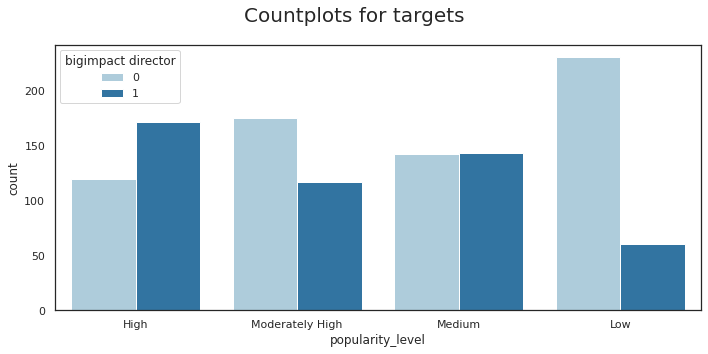

In [1881]:
sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["bigimpact director"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

#### separate good and bad from Kbest

In [1882]:
baddirector = []
for director in dataset.loc[(dataset["bigimpact director"] != 0)&(dataset["popularity_level"] == "Low")]["director"].values:
    baddirector.append(director)
baddirector = set(baddirector)

baddirector2 = {}
for director in selected_director:
    if director in baddirector:
        index = OHE_director.loc[OHE_director[director] != 0 ].index.tolist()
        baddirector2[director] = dataset.iloc[index]["popularity"].mean()

In [1883]:
baddirector2

{'Alex Gibney': 0.439277,
 'Alex Kendrick': 1.613124,
 'Ben Affleck': 8.471634333333332,
 'Brian Robbins': 0.6809797499999997,
 'Charles Martin Smith': 16.7970635,
 'Chris Columbus': 0.61916825,
 'Clint Eastwood': 1.6958491428571432,
 'David Cronenberg': 0.5966079999999995,
 'David Slade': 1.0899,
 'Francis Lawrence': 1.3375013333333332,
 'Greg Mottola': 0.7875673333333334,
 'James Cameron': 2.2553535,
 'John Carpenter': 1.7354842499999992,
 'Jon M. Chu': 0.6882376666666667,
 'Justin Lin': 1.3688292499999999,
 'Kathryn Bigelow': 4.833747333333333,
 'Kevin Macdonald': 1.5605926666666667,
 'Martin Campbell': 3.5500131999999995,
 'Oren Moverman': 1.5354895,
 'Paul W.S. Anderson': 1.1639807999999998,
 'Peter Berg': 2.37920375,
 'Randall Wallace': 4.3161575,
 'Rian Johnson': 1.117423333333333,
 'Rob Zombie': 1.4071425,
 'Ruben Fleischer': 1.3740463333333333,
 'Sean McNamara': 0.9114165,
 'Simon West': 3.304389666666667,
 'Tony Gilroy': 0.945411,
 'Uwe Boll': 1.211592,
 'Will Gluck': 2.36530

In [1884]:
final_baddirector = []
for i,v in baddirector2.items():
    if v < dataset["popularity"].mean():
        final_baddirector.append(i)

In [1885]:
mlist = []
for director in final_baddirector:
    index = OHE_director.loc[OHE_director[director] != 0 ].index.tolist()
    mlist.append(index)
mlist = [item for sublist in mlist for item in sublist]

dataset["bad director"] = dataset["index"].apply(lambda x : getpopcast(x, mlist))

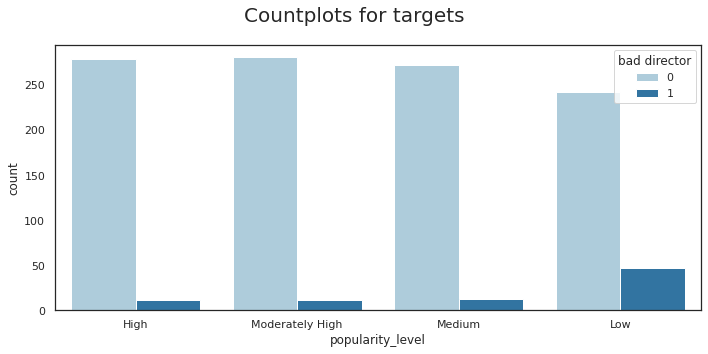

In [1886]:
sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["bad director"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

we can see that bad directors do have higher chance of making bad movies, however they consist of small percentage of the population, hence we try to set another criteria to extract out poor performing director

#### do directors with more movies make better movies?

In [1887]:
all_director = OHE_director.columns.tolist()
df_alldirector = pd.DataFrame(all_director, columns= ["director"])
df_alldirector["num_movies by director"] = df_alldirector["director"].apply(lambda x: countmovies(x,OHE_director))
df_alldirector = df_alldirector.sort_values(by = "num_movies by director", ascending = False)

In [1888]:
df_alldirector.head(50)

,director,num_movies by director
337,John Carpenter,12
695,Steven Spielberg,10
694,Steven Soderbergh,10
550,Peter Jackson,8
607,Robert Zemeckis,8
129,Clint Eastwood,7
216,Francis Lawrence,6
587,Ridley Scott,6
125,Christopher Nolan,6
621,Ron Howard,6


In [1889]:
dataset = dataset.merge(df_alldirector, on = "director", how = "left")

In [1890]:
dataset = dataset.sort_values(by = "popularity", ascending = False)

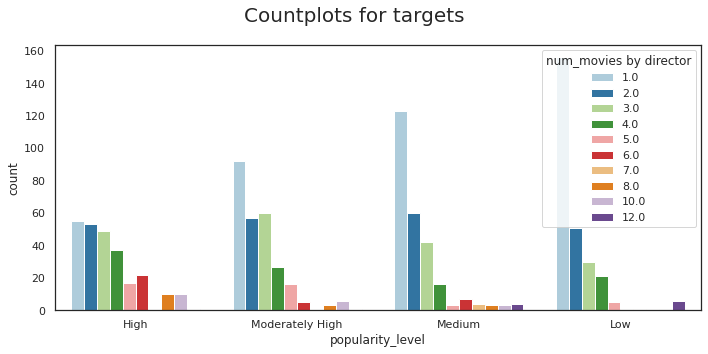

In [1891]:
sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["num_movies by director"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

from the plot, we see that inexperienced director (1 movie) do tend to make worst movies, however there are barely any trending for directors with 2 or more movies, hence we create one feature called inexperienced director

In [1892]:
inexperienced_director = df_alldirector.loc[df_alldirector["num_movies by director"] == 1]["director"].tolist()

In [1893]:
mlist = []
for director in inexperienced_director:
    index = OHE_director.loc[OHE_director[director] != 0 ].index.tolist()
    mlist.append(index)
mlist = [item for sublist in mlist for item in sublist]

dataset["inexperienced_director"] = dataset["index"].apply(lambda x : getpopcast(x, mlist))

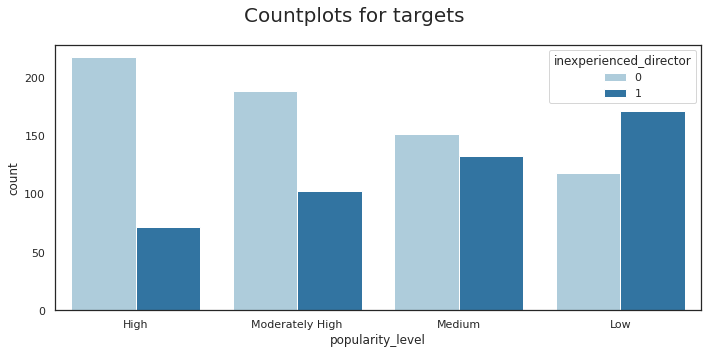

In [1894]:
sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["inexperienced_director"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

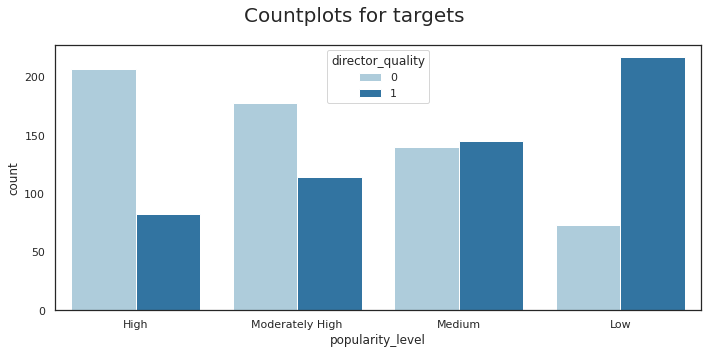

In [1895]:
dataset["director_quality"] = ((dataset["inexperienced_director"] + dataset["bad director"])/2).apply(lambda x: int(x+0.5))

sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["director_quality"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

In [1896]:
training_features.append("director_quality")

#num: [budget, revenue, runtime, vote_count, vote_average, profit, tagline length, overview length, num_goodcast]
#cat: [release month, director_quality]
#important list: final_goodcast, inexperienced_director, final_baddirector
training_features

['budget',
 'revenue',
 'runtime',
 'vote_count',
 'vote_average',
 'profit',
 'release_month',
 'tagline length',
 'overview length',
 'num_goodcast',
 'director_quality']

### feature extraction from production companies

#### one hot encode

In [1897]:
OHE_production = onehotencode(dataset,"production_companies")

In [1898]:
OHE_production.shape

(1157, 1480)

In [1899]:
OHE_production

"DIA" Productions GmbH & Co. KG  10th Hole Productions  \
0                                   0                      0   
1                                   0                      0   
2                                   0                      0   
3                                   0                      0   
4                                   0                      0   
...                               ...                    ...   
1152                                0                      0   
1153                                0                      0   
1154                                0                      0   
1155                                0                      0   
1156                                0                      0   

      11:11 Mediaworks  120dB Films  1492 Pictures  \
0                    0            0              0   
1                    0            0              0   
2                    0            0              0   
3                    0            0              0   
4                    0            0              0   
...                ...          ...            ...   
1152                 0            0              0   
1153                 0            0              0   
1154                 0            0              0   
1155                 0            0              0   
1156                 0            0              0   

      1984 Private Defense Contractors  2 Bridges Productions  2 Entertain  \
0                                    0                      0            0   
1                                    0                      0            0   
2                                    0                      0            0   
3                                    0                      0            0   
4                                    0                      0            0   
...                                ...                    ...          ...   
1152                                 0                      0            0   
1153                                 0                      0            0   
1154                                 0                      0            0   
1155                                 0                      0            0   
1156                                 0                      0            0   

      20th Century Fox  20th Century Fox Home Entertainment  \
0                    0                                    0   
1                    0                                    0   
2                    0                                    0   
3                    0                                    0   
4                    0                                    0   
...                ...                                  ...   
1152                 0                                    0   
1153                 0                                    0   
1154                 0                                    0   
1155                 0                                    0   
1156                 0                                    0   

      21 Laps Entertainment  26 Films  27 Films Production  2929 Productions  \
0                         0         0                    0                 0   
1                         0         0                    0                 0   
2                         0         0                    0                 0   
3                         0         0                    0                 0   
4                         0         0                    0                 0   
...                     ...       ...                  ...               ...   
1152                      0         0                    0                 0   
1153                      1         0                    0                 0   
1154                      0         0                    0                 0   
1155                      0         0                    0                 0   
1156          

#### SelectKbest

In [1900]:
# Perform feature selection using SelectKBest with chi-squared test
k = 100 # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k)
selected_features = selector.fit_transform(OHE_production, dataset["popularity_level"]) 

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_production = OHE_production.columns[selected_indices]
selected_production = selected_production.tolist()

In [1901]:
mlist = []
for production in selected_production:
    index = OHE_production.loc[OHE_production[production] != 0 ].index.tolist()
    mlist.append(index)
mlist = [item for sublist in mlist for item in sublist]

dataset["bigimpact production"] = dataset["index"].apply(lambda x : getpopcast(x, mlist))

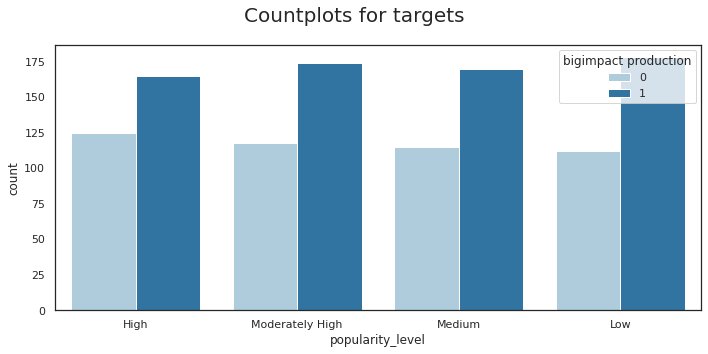

In [1902]:
sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["bigimpact production"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

looks like there are no significant bad production company, however lets add one more criteria to further source out good production company. this criteria will be based on the number of movies they produced, based on the assumption that a production company that produce more movies is likely to produce better movies.

In [1903]:
all_production = OHE_production.columns.tolist()
df_allproduction = pd.DataFrame(all_production, columns= ["production"])
df_allproduction["num_movies by production"] = df_allproduction["production"].apply(lambda x: countmovies(x,OHE_production))
df_allproduction = df_allproduction.sort_values(by = "num_movies by production", ascending = False)

In [1904]:
df_allproduction.head(300)

,production,num_movies by production
1407,Warner Bros.,108
1356,Universal Pictures,107
277,Columbia Pictures,65
1086,Relativity Media,63
984,Paramount Pictures,57
...,...,...
1205,Spring Creek Productions,2
117,Babieka,2
964,Overture Films,2
1199,South Australian Film Corporation,2


In [1905]:
popular_production = df_allproduction.loc[df_allproduction["num_movies by production"] > 30]["production"].tolist()
popular_production

['Warner Bros.',
 'Universal Pictures',
 'Columbia Pictures',
 'Relativity Media',
 'Paramount Pictures',
 'Walt Disney Pictures',
 'Twentieth Century Fox Film Corporation',
 'New Line Cinema',
 'Village Roadshow Pictures',
 'Metro-Goldwyn-Mayer (MGM)']

In [1906]:
mlist = []
for production in popular_production:
    index = OHE_production.loc[OHE_production[production] != 0 ].index.tolist()
    mlist.append(index)
mlist = [item for sublist in mlist for item in sublist]
dataset["popular production"] = dataset["index"].apply(lambda x : getpopcast(x, mlist))

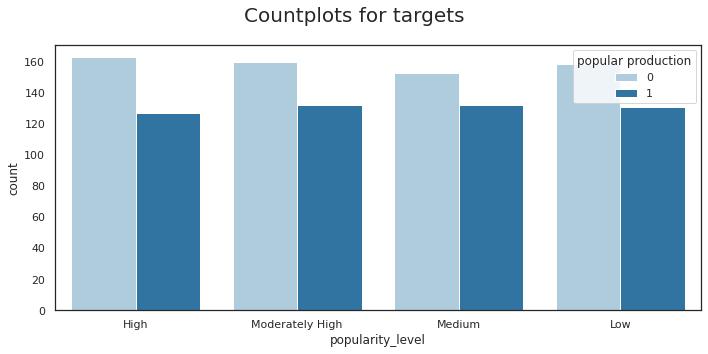

In [1907]:
sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["popular production"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

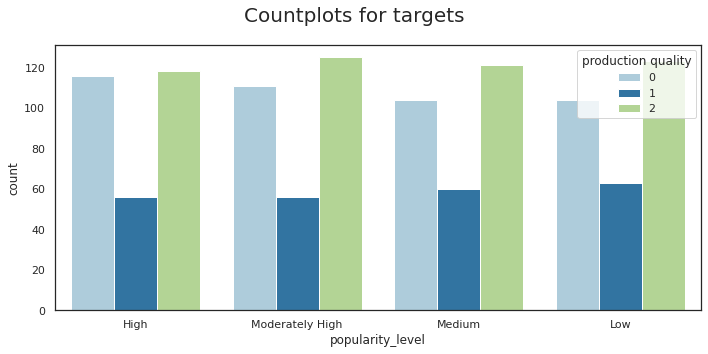

In [1908]:
dataset["production quality"] = dataset["popular production"] + dataset["bigimpact production"]

sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["production quality"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

- 2 indicates production company satisfy 2 criterias (high impact and produced many movies)
- 1 indicates production company satisfy 1 of the criteria
- 0 indicates production company does not satisfy any criteria of being a good production company

In [1909]:
training_features.append("production quality")

#num: [budget, revenue, runtime, vote_count, vote_average, tagline length, overview length, num_goodcast, production quality]
#cat: [release month, director_quality]
#important list: final_goodcast, inexperienced_director, final_baddirector, popular_production, selected_production
training_features

['budget',
 'revenue',
 'runtime',
 'vote_count',
 'vote_average',
 'profit',
 'release_month',
 'tagline length',
 'overview length',
 'num_goodcast',
 'director_quality',
 'production quality']

### feature extraction from keywords

#### one hot encode

In [1910]:
OHE_keywords = onehotencode(dataset,"keywords")

In [1911]:
OHE_keywords

17th century  1930s  1970s  3d  3d animation  admiration  adolescence  \
0                0      0      0   0             0           0            0   
1                0      0      0   0             0           0            0   
2                0      0      0   0             0           0            0   
3                0      0      0   0             0           0            0   
4                0      0      0   0             0           0            0   
...            ...    ...    ...  ..           ...         ...          ...   
1152             0      0      0   0             0           0            0   
1153             0      0      0   0             0           0            0   
1154             0      0      0   0             0           0            0   
1155             0      0      0   0             0           0            0   
1156             0      0      0   0             0           0            0   

      adoption  adoptive father  adoptive mother  adult as a child  adultery  \
0            0                0                0                 0         0   
1            0                0                0                 0         0   
2            0                0                0                 0         0   
3            0                0                0                 0         0   
4            0                0                0                 0         0   
...        ...              ...              ...               ...       ...   
1152         0                0                0                 0         0   
1153         0                0                0                 0         0   
1154         0                0                0                 0         0   
1155         0                0                0                 0         0   
1156         0                0                0                 0         0   

      advancement  adventure  advice  aerobics  afghanistan  africa  \
0               0          0       0         0            0       0   
1               0          0       0         0            0       0   
2               0          0       0         0            0       0   
3               0          0       0         0            0       0   
4               0          0       0         0            0       0   
...           ...        ...     ...       ...          ...     ...   
1152            0          0       0         0            0       0   
1153            0          0       0         0            0       0   
1154            0          0       0         0            0       0   
1155            0          0       0         0            0       0   
1156            0          0       0         0            0       0   

      african american  aftercreditsstinger  afterlife  age difference  agent  \
0                    0                    0          0               0      0   
1                    0                    0          0               0      0   
2                    0                    0          0               0      0   
3                    0                    0          0               0      0   
4                    0                    0          0               0      0   
...                ...                  ...        ...             ...    ...   
1152                 0                    0          0               0      0   
1153                 0                    0          0               0      0   
1154                 0                    0          0               0      0   
1155                 0                    0          0               0      0   
1156                 0                    0          0               0      0   

      agriculture  aids  air force one  airplane  airport  alaska  alcohol  \
0               0     0              0         0        0       0        0   
1               0     0              0         0        0       0        0   
2               0     0             

#### SelectKbest

In [1912]:
# Perform feature selection using SelectKBest with chi-squared test
k = 200 # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k)
selected_features = selector.fit_transform(OHE_keywords, dataset["popularity_level"]) 

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_keywords = OHE_keywords.columns[selected_indices]
selected_keywords = selected_keywords.tolist()

In [1913]:
selected_keywords

['3d',
 'afghanistan',
 'age difference',
 'airport',
 'android',
 'animation',
 'arms dealer',
 'artificial intelligence',
 'baby',
 'bad boss',
 'based on novel',
 'beach',
 'black comedy',
 'brothel',
 'budapest',
 'canada',
 'cartoon',
 'cat',
 'catastrophe',
 'childhood memory',
 'china',
 'chosen one',
 'clerk',
 'comic',
 'computer animation',
 'computer virus',
 'cook',
 'country music',
 'criminal mastermind',
 'cutting the cord',
 'cyborg',
 'dark fantasy',
 'dc comics',
 'death of a friend',
 'death star',
 'delorean',
 'dementia',
 'doctor',
 'document',
 'dolphin',
 'dwarves',
 'dystopia',
 'earth',
 'east india trading company',
 'elves',
 'england',
 'evisceration',
 'exotic island',
 'factory',
 'fairy tale',
 'falsely accused person',
 "family's daily life",
 'father',
 'female assassin',
 'female nudity',
 'fictional place',
 'fish',
 'flying',
 'fox',
 'friends',
 'future',
 'futuristic',
 'galaxy',
 'gas station',
 'gay',
 'giant monster',
 'global warming',
 'gueri

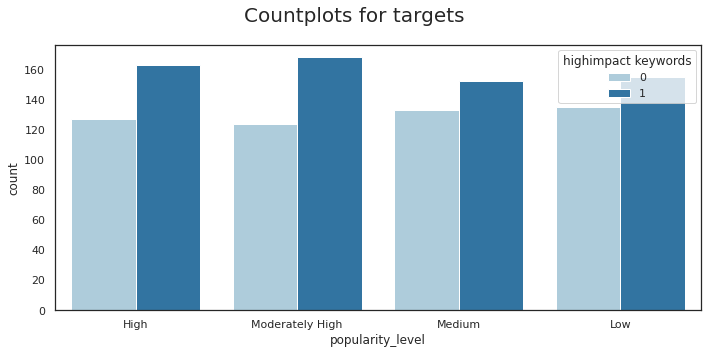

In [1914]:
mlist = []
for keywords in selected_keywords:
    index = OHE_keywords.loc[OHE_keywords[keywords] != 0 ].index.tolist()
    mlist.append(index)
mlist = [item for sublist in mlist for item in sublist]

dataset["highimpact keywords"] = dataset["index"].apply(lambda x : getpopcast(x, mlist))

sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["highimpact keywords"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

#### separate good and bad from Kbest

In [1915]:
badkeywords = []
for keywords in dataset.loc[(dataset["highimpact keywords"] != 0)&(dataset["popularity_level"] == "Low")]["keywords"].values:
    keywords = keywords.split("|")
    badkeywords.append(keywords)
badkeywords = [item for sublist in badkeywords for item in sublist]
badkeywords = set(badkeywords)

badkeywords2 = {}
for keywords in selected_keywords:
    if keywords in badkeywords:
        index = OHE_keywords.loc[OHE_keywords[keywords] != 0 ].index.tolist()
        badkeywords2[keywords] = dataset.iloc[index]["popularity"].mean()
        
final_badkeywords = []
for i,v in badkeywords2.items():
    if v < dataset["popularity"].mean():
        final_badkeywords.append(i)

In [1916]:
goodkeywords = []
for keywords in dataset.loc[(dataset["highimpact keywords"] != 0)&(dataset["popularity_level"] == "High")]["keywords"].values:
    keywords = keywords.split("|")
    goodkeywords.append(keywords)
goodkeywords = [item for sublist in goodkeywords for item in sublist]
goodkeywords = set(goodkeywords)

goodkeywords2 = {}
for keywords in selected_keywords:
    if keywords in goodkeywords:
        index = OHE_keywords.loc[OHE_keywords[keywords] != 0 ].index.tolist()
        goodkeywords2[keywords] = dataset.iloc[index]["popularity"].mean()
        
final_goodkeywords = []
for i,v in goodkeywords2.items():
    if v > dataset["popularity"].mean():
        final_goodkeywords.append(i)

In [1917]:
final_badkeywords

['afghanistan',
 'age difference',
 'baby',
 'beach',
 'canada',
 'cat',
 'clerk',
 'computer animation',
 'country music',
 'death of a friend',
 'dolphin',
 'earth',
 'father',
 'female nudity',
 'gay',
 'global warming',
 'haunting',
 'independent film',
 'japanese',
 'killing',
 'lie',
 'london',
 'lone wolf',
 'mannequin',
 'minnesota',
 'music record',
 'paranormal',
 'park',
 'poetry',
 'psychopath',
 'scandal',
 'shark attack',
 'strange person',
 'student',
 'woman director']

In [1918]:
final_goodkeywords

['3d',
 'android',
 'animation',
 'arms dealer',
 'artificial intelligence',
 'bad boss',
 'based on novel',
 'cartoon',
 'catastrophe',
 'chosen one',
 'comic',
 'computer virus',
 'cook',
 'criminal mastermind',
 'cutting the cord',
 'cyborg',
 'dc comics',
 'death star',
 'delorean',
 'dwarves',
 'dystopia',
 'east india trading company',
 'elves',
 'england',
 'evisceration',
 'exotic island',
 'factory',
 'fairy tale',
 'falsely accused person',
 'fictional place',
 'flying',
 'friends',
 'future',
 'futuristic',
 'giant monster',
 'guerilla',
 'hitman',
 'hobbits',
 'holy grail',
 'homesickness',
 'imax',
 'immortality',
 'intelligence',
 'james bond',
 'jedi',
 'kingdom',
 'library',
 'lightning',
 'magic',
 'magic mirror',
 'malibu',
 'man vs machine',
 'martial arts',
 'marvel comic',
 'middle-earth (tolkien)',
 'mountains',
 'nasa',
 'nerd',
 'orcs',
 'paris',
 'rebel',
 'resistance',
 'riddle',
 'rival',
 'sadism',
 'saving the world',
 'school',
 'scotland yard',
 'secret i

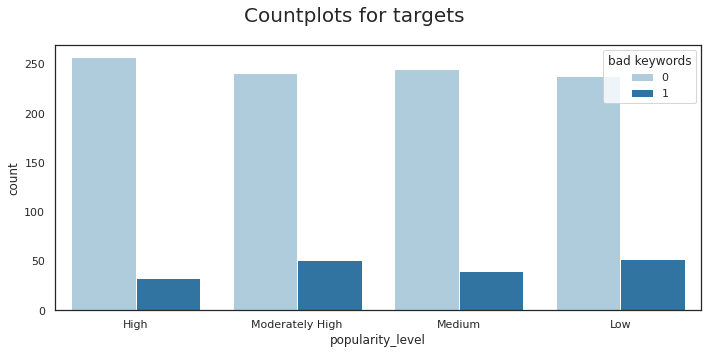

In [1919]:
mlist = []
for keywords in final_badkeywords:
    index = OHE_keywords.loc[OHE_keywords[keywords] != 0 ].index.tolist()
    mlist.append(index)
mlist = [item for sublist in mlist for item in sublist]

dataset["bad keywords"] = dataset["index"].apply(lambda x : getpopcast(x, mlist))

sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["bad keywords"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

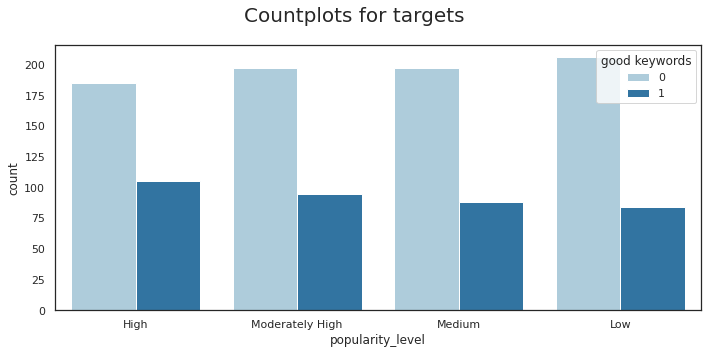

In [1920]:
mlist = []
for keywords in final_goodkeywords:
    index = OHE_keywords.loc[OHE_keywords[keywords] != 0 ].index.tolist()
    mlist.append(index)
mlist = [item for sublist in mlist for item in sublist]

dataset["good keywords"] = dataset["index"].apply(lambda x : getpopcast(x, mlist))

sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["good keywords"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

In [1921]:
dataset["keyword quality"] = -dataset["bad keywords"]+dataset["good keywords"]

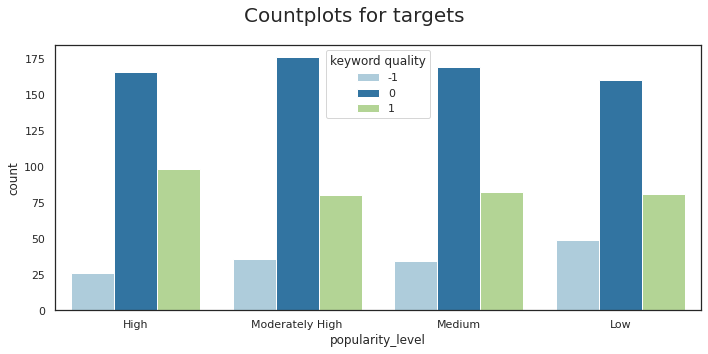

In [1922]:
sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["keyword quality"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

In [1923]:
training_features.append("keyword quality")

#num: [budget, revenue, runtime, vote_count, vote_average, tagline length, overview length, num_goodcast, production quality, keyword quality]
#cat: [release month, director_quality]
#important list: final_goodcast, inexperienced_director, final_baddirector, popular_production, selected_production,final_badkeywords,final_goodkeywords 
training_features

['budget',
 'revenue',
 'runtime',
 'vote_count',
 'vote_average',
 'profit',
 'release_month',
 'tagline length',
 'overview length',
 'num_goodcast',
 'director_quality',
 'production quality',
 'keyword quality']

#### feature extraction from genre

In [1924]:
OHE_genre = onehotencode(dataset,"genres")

In [1925]:
OHE_genre

,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,Thriller,War,Western
0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1153,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1154,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1155,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


#### SelectKbest

In [1926]:
# Perform feature selection using SelectKBest with chi-squared test
k = 4 # Number of top features to select
selector = SelectKBest(score_func=chi2, k=k)
selected_features = selector.fit_transform(OHE_genre, dataset["popularity_level"]) 

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_genre = OHE_genre.columns[selected_indices]
selected_genre = selected_genre.tolist()

In [1927]:
selected_genre

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

In [1928]:
mlist = []
for genre in selected_genre:
    index = OHE_genre.loc[OHE_genre[genre] != 0 ].index.tolist()
    mlist.append(index)
mlist = [item for sublist in mlist for item in sublist]
dataset["highimpact genre"] = dataset["index"].apply(lambda x : getpopcast(x, mlist))

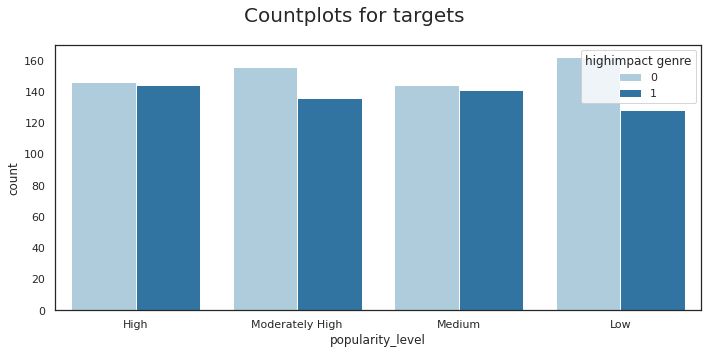

In [1929]:
sns.set_palette('Paired')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.countplot(x=dataset["popularity_level"], hue=dataset["highimpact genre"], ax=ax)
fig.suptitle('Countplots for targets', fontsize=20)
plt.tight_layout()
# plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=len(dataset["release_year"].unique()))
#ax.legend_.remove()

the list of selected genre of 4 out of 19 genres seems to be popular, we will directly use this as the feature

In [1930]:
training_features.append("highimpact genre")

#num: [budget, revenue, runtime, vote_count, vote_average, tagline length, overview length, num_goodcast, production quality, keyword quality]
#cat: [release month, director_quality, highimpact genre]
#important list: final_goodcast, inexperienced_director, final_baddirector, popular_production, selected_production,final_badkeywords,final_goodkeywords, selected_genre 
training_features

['budget',
 'revenue',
 'runtime',
 'vote_count',
 'vote_average',
 'profit',
 'release_month',
 'tagline length',
 'overview length',
 'num_goodcast',
 'director_quality',
 'production quality',
 'keyword quality',
 'highimpact genre']

## Preprocessing

In the previous section, we have explored the data and found a few ways to extract the features from raw data. In this section, we will need to create a pipeline to transform the features for both training and test datasets

In [1931]:
def get_release_month(dataset):
    dataset["release_month"] = dataset["release_date"].apply(lambda x : x.month)
    return dataset
def get_length(dataset):
    dataset["title length"] = dataset["original_title"].apply(lambda x: getlength(x))
    dataset["tagline length"] = dataset["tagline"].apply(lambda x: getlength(x))
    dataset["overview length"] = dataset["overview"].apply(lambda x: getlength(x))
    return dataset
#=======================================================
def calc_accum(listitem, x):
    i = 0
    for item in listitem:
        if item in x:
            i+=1
    return i
def get_num_goodcast(final_goodcast, dataset):
    dataset["num_goodcast"] = dataset["cast"].apply(lambda x : calc_accum(final_goodcast, x))
    return dataset
#=======================================================
def calc(listitem, x):
    for item in listitem:
        if item in x:
            return 1
        else:
            return 0
def get_director_quality(final_baddirector, inexperienced_director, dataset):
    dataset["bad director"] = dataset["director"].apply(lambda x : calc(final_baddirector, x))
    dataset["inexperienced_director"] = dataset["director"].apply(lambda x : calc(inexperienced_director, x))
    dataset["director_quality"] = ((dataset["inexperienced_director"] + dataset["bad director"])/2).apply(lambda x: int(x+0.5))
    return dataset
def get_production_quality(selected_production, popular_production, dataset):
    dataset["bigimpact production"] = dataset["production_companies"].apply(lambda x : calc(selected_production, x))
    dataset["popular production"] = dataset["production_companies"].apply(lambda x : calc(popular_production, x))
    dataset["production quality"] = dataset["popular production"] + dataset["bigimpact production"]
    return dataset
def get_keyword_quality(final_badkeywords, final_goodkeywords, dataset):
    dataset["bad keywords"] = dataset["keywords"].apply(lambda x : calc(final_badkeywords, x))
    dataset["good keywords"] = dataset["keywords"].apply(lambda x : calc(final_goodkeywords, x))
    dataset["keyword quality"] = -dataset["bad keywords"]+dataset["good keywords"]
    return dataset
def get_highimpact_genre(selected_genre, dataset):
    dataset["highimpact genre"] = dataset["genres"].apply(lambda x : calc(selected_genre, x))
    return dataset


In [1932]:
training_features

['budget',
 'revenue',
 'runtime',
 'vote_count',
 'vote_average',
 'profit',
 'release_month',
 'tagline length',
 'overview length',
 'num_goodcast',
 'director_quality',
 'production quality',
 'keyword quality',
 'highimpact genre']